In [45]:
import pandas as pd

In [89]:
df=pd.read_csv('AAPL.csv')


In [47]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [48]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [49]:
df1=df.reset_index()['high']

In [50]:
df1

0       132.260
1       131.950
2       131.450
3       131.390
4       130.655
         ...   
1253    316.500
1254    318.520
1255    319.520
1256    320.890
1257    319.230
Name: high, Length: 1258, dtype: float64

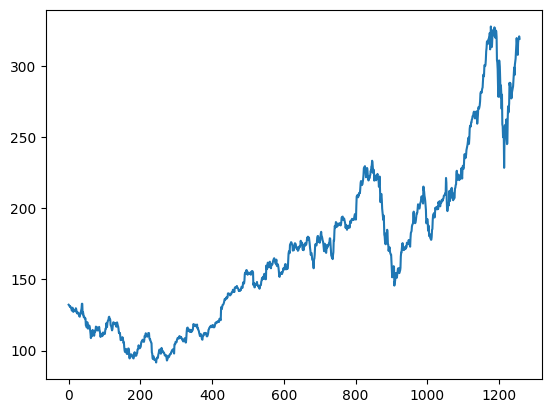

In [51]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [52]:
import numpy as np

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [54]:
df1

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       ...,
       [0.96473029],
       [0.97053095],
       [0.96350241]])

In [55]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [56]:
training_size,test_size

(817, 441)

In [57]:
train_data

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       [0.16817681],
       [0.16506478],
       [0.16627149],
       [0.16474723],
       [0.16097891],
       [0.15894657],
       [0.15416208],
       [0.15949699],
       [0.1630536 ],
       [0.15522059],
       [0.15060547],
       [0.15318825],
       [0.15331527],
       [0.15513591],
       [0.15306122],
       [0.1540774 ],
       [0.15217207],
       [0.16144466],
       [0.15890423],
       [0.15378101],
       [0.14734525],
       [0.14586332],
       [0.14933525],
       [0.14827674],
       [0.14632907],
       [0.14599035],
       [0.13959692],
       [0.13714116],
       [0.13625201],
       [0.14431789],
       [0.14692184],
       [0.15022441],
       [0.15623677],
       [0.16068253],
       [0.17486663],
       [0.17465492],
       [0.14323821],
       [0.14997036],
       [0.14425438],
       [0.13523584],
       [0.13650605],
       [0.13477009],
       [0.13083199],
       [0.13113939],
       [0.130

In [58]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [59]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [60]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [61]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [62]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [63]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [64]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\rk283\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - loss: 0.0341 - val_loss: 0.0743
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0016 - val_loss: 0.0046
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 8.4270e-04 - val_loss: 0.0052
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 6.5675e-04 - val_loss: 0.0071
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 6.5258e-04 - val_loss: 0.0040
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 5.5103e-04 - val_loss: 0.0040
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 5.7731e-04 - val_loss: 0.0040
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 5.8634e-04 - val_loss: 0.0035
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 5.6535e-04 - val_loss: 0.0040
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 5.8470e-04 - val_loss: 0.0038
Epoch 12/

In [69]:
import tensorflow as tf

In [70]:
tf.__version__

'2.16.1'

In [71]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [72]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [73]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.90682751941162

In [74]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

238.6677040662945

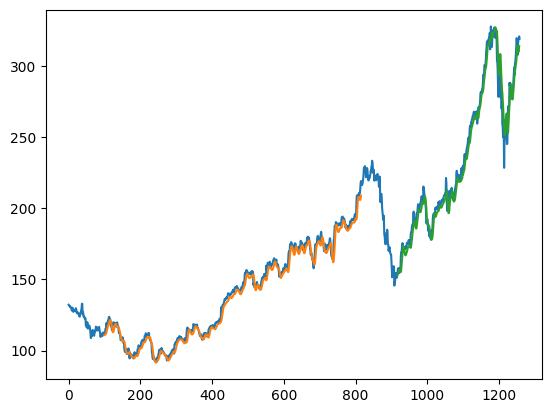

In [75]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [76]:
len(test_data)

441

In [77]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [78]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [79]:
temp_input

[0.855322211872301,
 0.8846218985519521,
 0.8845372173765771,
 0.8819121009399611,
 0.8858921161825726,
 0.9008802608180202,
 0.9262426962486241,
 0.935726987890592,
 0.954356846473029,
 0.956473875857397,
 0.947709374206114,
 0.948556185959861,
 0.9614277246168177,
 0.9626132610720637,
 0.9667202980777374,
 0.9648996528071809,
 0.9808620543653146,
 0.9319163349987298,
 0.9599881446354475,
 1.0000000000000002,
 0.9840799390295536,
 0.9781099161656364,
 0.9391989160809553,
 0.9652383775086799,
 0.9869167584046066,
 0.9888644254382253,
 0.9811584384791261,
 0.9733254297569651,
 0.9832754678634938,
 0.9973325429756967,
 0.993098484206961,
 0.9920823101024643,
 0.9657041239732409,
 0.9861122872385468,
 0.9864510119400456,
 0.9686679651113557,
 0.8997798289440258,
 0.8927936319756118,
 0.8731052587009909,
 0.8228046405284106,
 0.7906681344737065,
 0.88817850791769,
 0.8990176983656533,
 0.8964772631044118,
 0.8801761368447796,
 0.8432128037937168,
 0.789313235667711,
 0.8246676263866544,
 0

In [80]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.96116656]
101
1 day input [0.8846219  0.88453722 0.8819121  0.88589212 0.90088026 0.9262427
 0.93572699 0.95435685 0.95647388 0.94770937 0.94855619 0.96142772
 0.96261326 0.9667203  0.96489965 0.98086205 0.93191633 0.95998814
 1.         0.98407994 0.97810992 0.93919892 0.96523838 0.98691676
 0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.89579981 0.

In [81]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [82]:
import matplotlib.pyplot as plt

In [83]:
len(df1)

1258

In [84]:
scaler.inverse_transform(lst_output)

array([[318.67831829],
       [319.26203872],
       [319.26882404],
       [319.10773607],
       [318.96829917],
       [318.92748872],
       [319.01385372],
       [319.2330533 ],
       [319.57724635],
       [320.02994818],
       [320.56943734],
       [321.17234529],
       [321.81664088],
       [322.48338996],
       [323.15821949],
       [323.83150049],
       [324.49815103],
       [325.1565522 ],
       [325.80790057],
       [326.45489903],
       [327.10120769],
       [327.7501629 ],
       [328.40473501],
       [329.06699339],
       [329.73803609],
       [330.41806018],
       [331.10669966],
       [331.80291279],
       [332.50557338],
       [333.21321738]])

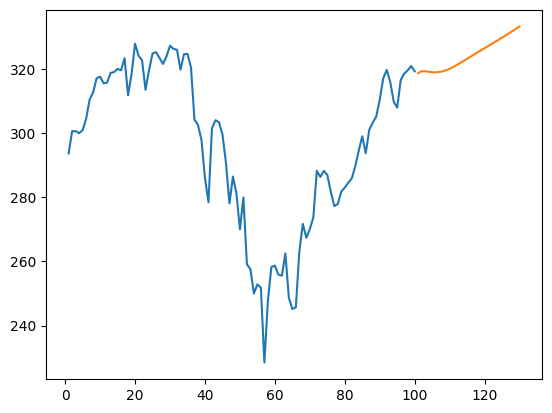

In [85]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

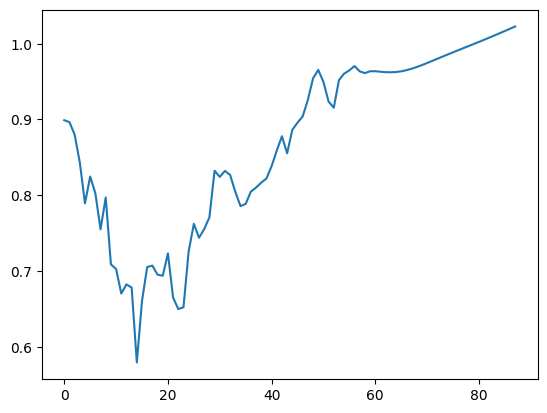

In [86]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [87]:
df3=scaler.inverse_transform(df3).tolist()

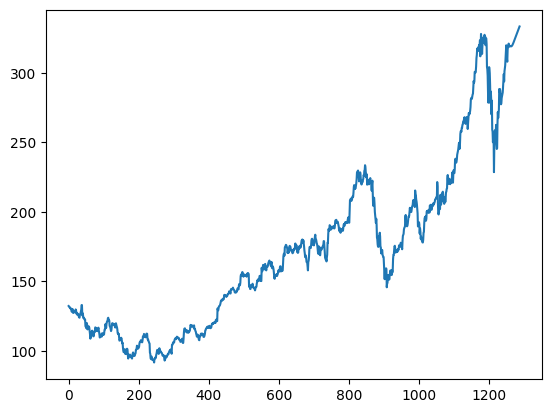

In [88]:
plt.plot(df3)